# 01. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r'C:\Users\Lawrence\Documents\Career Foundry Projects\Data Immersion\Achievement #4\2023 Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

# 02. Creating Visualizations

<Axes: xlabel='orders_day_of_the_week'>

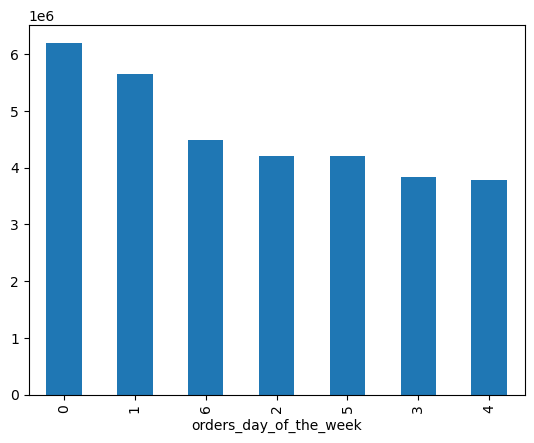

In [3]:
# Create a bar chart
ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_the_week'>

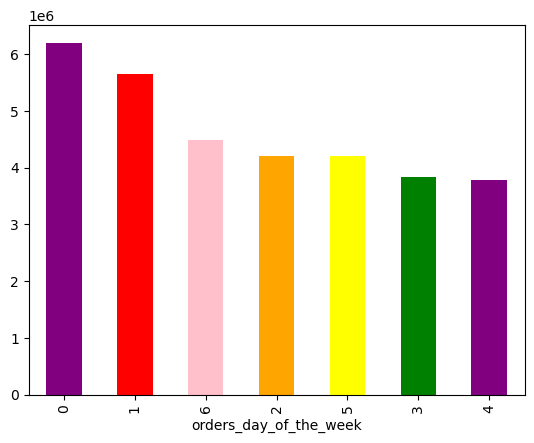

In [4]:
# Add color to the bar chart
ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green'])

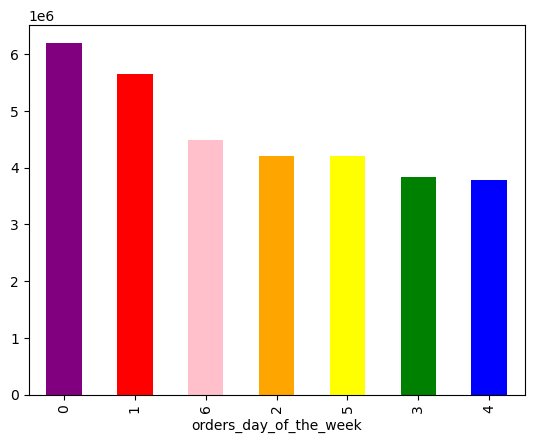

In [5]:
# Export the bar chart
bar = ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_down.png'))

<Axes: ylabel='Frequency'>

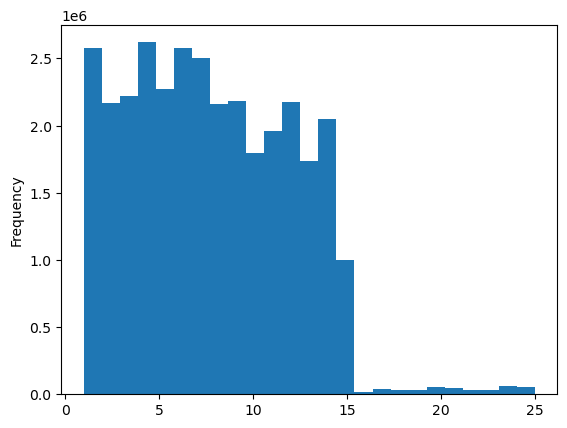

In [7]:
# Create a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

In [8]:
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

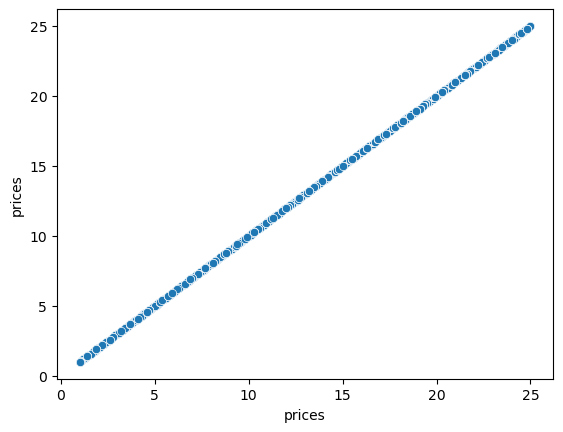

In [9]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [10]:
ords_prods_merge[['order_id', 'user_id','prices']].loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,prices


In [11]:
# Mark rows with outlier prices as missing
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [12]:
ords_prods_merge['prices'].max()

25.0

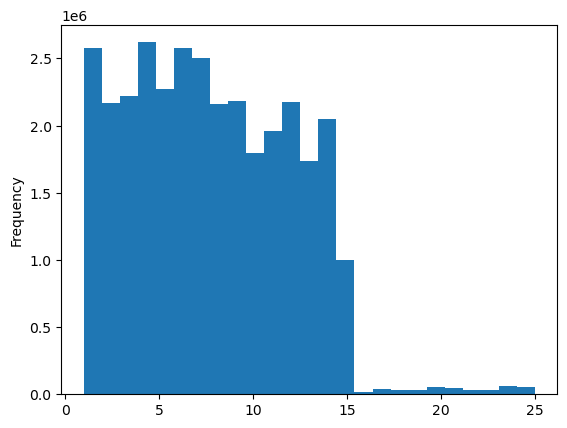

In [13]:
# Create histogram again
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

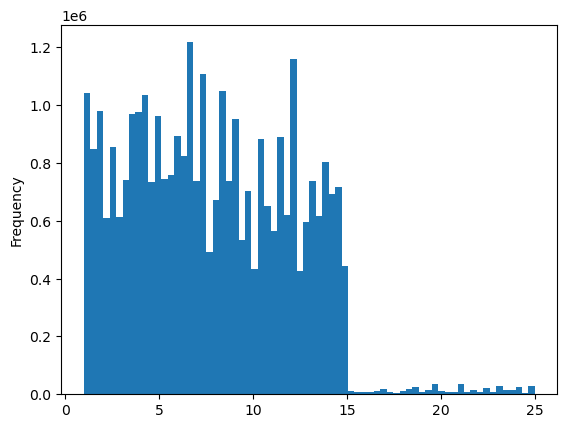

In [14]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [15]:
# Export histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [16]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [17]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [18]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [19]:
len(ords_prods_merge)

32404859

In [20]:
len(big) + len(small)

32404859

In [21]:
df_2 = small[['orders_day_of_the_week', 'prices']]

In [22]:
df_2.head()

,orders_day_of_the_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lawrence\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

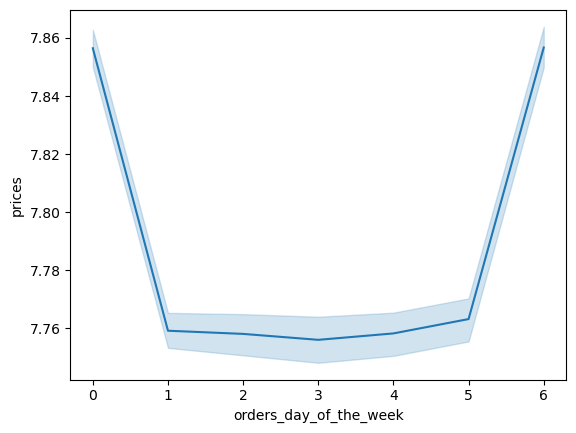

In [23]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week', y = 'prices')